# Problem Statement

I signed up for an Ames housing data challenge on Kaggle. The challenge is to create a regression model to predict a price of a home. The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses. The model used to predict prices of homes will be an OLS (Ordinary Least Squared) Model. OLS is a white box model, which means I can use coefficents form the model to gauge what features effect the price of a home. The success of the model will be determined by overall preformance of prediction on data the model was not trained on. If successful, the model could be used by sellers and buyers to determine a fair market price for homes on the market. Also, the model could be used by home flippers to focus on upgrading certain features to increase the price of a home to make a better profit when they sell. 


# Imports and loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
data = '../datasets/'
train = 'train.csv'
test = 'test.csv'

In [4]:
train_data = pd.read_csv(data+train)
test_data = pd.read_csv(data+test)

In [5]:
train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
train_data.shape

(2051, 81)

In [7]:
test_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
test_data.shape

(878, 80)

# Data description

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**PID**|int64| Train/Test |Parcel identification number  - can be used with city web site for parcel review.|
|**MS SubClass**| int64 |Train/Test|Identifies the type of dwelling involved in the sale.	|
|**MS Zoning**| object| Train/Test | Identifies the general zoning classification of the sale. |
|**Lot Frontage** | float64 | Train/Test | Linear feet of street connected to property |
|**Lot Area** |int64|Train/Test|Lot size in square feet|
|**Street**| object | Train/Test | Type of road access to property |
|**Alley**| object | Train/Test | Type of alley access to property |
|**Lot Shape** | object | Train/Test | General shape of property |
|**Land Contour** | object | Train/Test |Flatness of the property| 
|**Utilities**| object | Train/Test | Type of utilities available|
|**Lot Config** | object | Train/Test | Lot configuration|
|**Land Slope**| object | Train/Test |Slope of property |
|**Neighborhood**| object | Train/Test | Physical locations within Ames city limits|
|**Condition 1**| object | Train/Test | Proximity to various conditions|
|**Condition 2**| object | Train/Test | Proximity to various conditions (if more than one is present)|
|**Bldg Type** | object | Train/Test | Type of dwelling |
| **House Style** | object | Train/Test | Style of dwelling |
| **Overall Qual** | int64 | Train/Test | Rates the overall material and finish of the house |
|**Overall Cond** | int64 | Train/Test | Rates the overall condition of the house |
|**Year Built** | int64 | Train/Test | Original construction date |
|**Year Remod/Add** | int64 | Train/Test | Remodel date (same as construction date if no remodeling or additions) |
|**Roof Style**| object | Trian/Test | Type of roof |
|**Roof Matl** | object | Train/Test | Roof material |
|**Exterior 1st**| object | Train/Test |Exterior covering on house|
|**Exterior 2nd**| object | Train/Test | Exterior covering on house (if more than one material) | 
|**Mas Vnr Type** | object | Train/Test | Masonry veneer type|
|**Mas Vnr Area** | float64 | Train/Test | Masonry veneer area in square feet|
|**Exter Qual** | object | Train/Test | Evaluates the quality of the material on the exterior|
|**Exter Cond**| object | Train/Test | Evaluates the present condition of the material on the exterior |
|**Foundation**| object | Train/Test | Type of foundation |
|**Bsmt Qual**| object | Train/Test | Evaluates the height of the basement|
|**Bsmt Cond**|object|Train/Test|Evaluates the general condition of the basement|
|**Bsmt Exposure**|object|Train/Test| Refers to walkout or garden level walls|
|**BsmtFin Type 1**|object| Train/Test|Rating of basement finished area|
|**BsmtFin SF 1**|float64|Train/Test|Type 1 finished square feet|
|**BsmtFinType 2**|object|Train/Test|Rating of basement finished area (if multiple types)|
|**BsmtFin SF 2**|float64|Train/Test|Type 2 finished square feet|
|**Bsmt Unf SF**|float64|Train/Test|Unfinished square feet of basement area|
|**Total Bsmt SF**|float64|Train/Test|Total square feet of basement area|
|**Heating**|object|Train/Test| Type of heating|
|**HeatingQC**|object|Train/Test| Heating quality and condition|
|**Central Air**|object|Train/Test| Central air conditioning|
|**Electrical**|object|Train/Test| Electrical system |
|**1st Flr SF**|int64|Train/Test| First Floor square feet|
|**2nd Flr SF**|int64|Train/Test| Second floor square feet|
|**Low Qual Fin SF**|int64|Train/Test| Low quality finished square feet (all floors)|
|**Gr Liv Area**|int64|Train/Test| Above grade (ground) living area square feet|
|**Bsmt Full Bath**|float64|Train/Test| Basement full bathrooms|
|**Bsmt Half Bath**|float64|Train/Test| Basement half bathrooms|
|**Full Bath**|int64|Train/Test|Full bathrooms above grade|
|**Half Bath**|int64|Train/Test| Half baths above grade|
|**Bedroom**|int64|Train/Test| Bedrooms above grade (does NOT include basement bedrooms)|
|**Kitchen**|int64|Train/Test| Kitchens above grade|
|**KitchenQual**|object|Train/Test|Kitchen quality|
|**TotRmsAbvGrd**|int64|Train/Test| Total rooms above grade (does not include bathrooms)|
|**Functional**|object|Train/Test|Home functionality (Assume typical unless deductions are warranted)|
|**Fireplaces**|int64|Train/Test|Number of fireplaces|
|**FireplaceQu**|object|Train/Test|Fireplace quality|
|**Garage Type**|object|Train/Test|Garage location|
|**Garage Yr Blt**|float64|Train/Test| Year garage was built|
|**Garage Finish**|object|Train/Test| Interior finish of the garage|
|**Garage Cars**|float64|Train/Test|Size of garage in car capacity|
|**Garage Area**|float64|Train/Test|Size of garage in square feet|
|**Garage Qual**|object|Train/Test|Garage quality|
|**Garage Cond**|object|Train/Test|Garage condition|
|**Paved Drive**|object|Train/Test|Paved driveway|
|**Wood Deck SF**|int64| Train/Test|Wood deck area in square feet|
|**Open Porch SF**|int64|Train/Test|Open porch area in square feet|
|**Enclosed Porch**|int64|Train/Test|Enclosed porch area in square feet|
|**3-Ssn Porch**|int64|Train/Test|Three season porch area in square feet|
|**Screen Porch**|int64|Train/Test|Screen porch area in square feet|
|**Pool Area**|int64|Train/Test|Pool area in square feet|
|**Pool QC**|object|Train/Test|Pool quality|
|**Fence**|object|Train/Test|Fence quality|
|**Misc Feature**|object|Train/Test|Miscellaneous feature not covered in other categories|
|**Misc Val**|int64|Train/Test|$Value of miscellaneous feature|
|**Mo Sold**|int64|Train/Test|Month Sold (MM)|
|**Yr Sold**|int64|Train/Test|Year Sold (YYYY)|
|**Sale Type**|object|Train/Test|Type of sale|
|**Sale Condition**|object|Train/Test|Condition of sale|
|**SalePrice**|int64|Train|Sale price $$|

MS SubClass:

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
MS Zoning:

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Street:

       Grvl	Gravel	
       Pave	Paved
       	
Alley:

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
Lot Shape:

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
Land Contour:

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression 

Utilities: 
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
       
Land Slope:
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
       
Neighborhood:

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       Greens	Greens
       GrnHill	Green Hills
       IDOTRR	Iowa DOT and Rail Road
       Landmrk	Landmark
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
       
Condition 1:
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition 2: 
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Bldg Type:
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
House Style:
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
Overall Qual: 

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
Overall Cond:

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
       
Roof Style:

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
Roof Matl:

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior 1st:

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior 2nd: 

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
       
Exter Qual:
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Exter Cond:
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: 

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

Bsmt Qual:

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
Bsmt Cond:

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
Bsmt Exposure:

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFin Type 1:

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType 2:

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       

Heating:
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC:

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Central Air:

       N	No
       Y	Yes
		
Electrical:

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       
KitchenQual:

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       
Functional: 

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
       
Fireplace Qu:

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
Garage Type:
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
       
Garage Finish:

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
	
Garage Qual: 

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
Garage Cond: 

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
Paved Drive: 

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
 
Pool QC:
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence:
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
Misc Feature:
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
Sale Type:
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
Sale Condition:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
Mas Vnr Type:

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	    None
       Stone	Stone

# **Data Cleaning and EDA**

In [9]:
train_data.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Electrical         0
Central Air        0
Heating QC         0
Sale Type          0
Id                 0
Length: 81, dtype: int64

In [10]:
test_data.isnull().sum().sort_values(ascending=False)

Pool QC         874
Misc Feature    837
Alley           820
Fence           706
Fireplace Qu    422
               ... 
Heating QC        0
Heating           0
Yr Sold           0
Bsmt Unf SF       0
Id                0
Length: 80, dtype: int64

In the training data, all the missing variables are mostly from houses that do not have a certain features. For example, a house might not have a garage, and there are a couple of garage features. I replaced all the missing features with there reference. The test data had simmliar issue, but it was also missing electrical data entry. I replaced that with the most frequent electrical system. 

In [11]:
#replacing nan with No pool for pool qc
train_data['Pool QC'].fillna('No Pool',inplace = True)

In [12]:
#replacing nan with No Feature
train_data['Misc Feature'].fillna('No Feature',inplace=True)

In [13]:
#replace nan with  No Alley access
train_data['Alley'].fillna('No alley access',inplace=True)

In [14]:
#replace nan with no fence
train_data['Fence'].fillna('No fence',inplace=True)

In [15]:
#replace nan with fireplace qu
train_data['Fireplace Qu'].fillna('No fireplace',inplace=True)

In [16]:
#replace nan with to 0 because there is no sq__ft
train_data['Lot Frontage'].fillna(0,inplace=True)

In [17]:
#replace nan with to No Garage
train_data['Garage Finish'].fillna('No Garage',inplace=True)

In [18]:
#replace nan with to No Garage
train_data['Garage Cond'].fillna('No Garage',inplace=True)

In [19]:
#replace nan with to No Garage
train_data['Garage Yr Blt'].fillna(0,inplace=True)

In [20]:
#replace nan with to No Garage
train_data['Garage Qual'].fillna('No Garage',inplace=True)

In [21]:
#replace nan with to No Garage
train_data['Garage Type'].fillna('No Garage',inplace=True)

In [22]:
#replace nan with to No Basement
train_data['Bsmt Exposure'].fillna('No Basement',inplace=True)

In [23]:
#replace nan with to No Basement
train_data['Bsmt Exposure'].fillna('No Basement',inplace=True)

In [24]:
#replace nan with to No Basement
train_data['BsmtFin Type 2'].fillna('No Basement',inplace=True)

In [25]:
#replace nan with to No Basement
train_data['BsmtFin Type 1'].fillna('No Basement',inplace=True)

In [26]:
#replace nan with to No Basement
train_data['Bsmt Qual'].fillna('No Basement',inplace=True)

In [27]:
#replace nan with to No Basement
train_data['Bsmt Cond'].fillna('No Basement',inplace=True)

In [28]:
#replace nan with to No Basement
train_data['Mas Vnr Type'].fillna('None',inplace=True)

In [29]:
#replace nan with to No Basement
train_data['Mas Vnr Area'].fillna(0,inplace=True)

In [30]:
#replace nan with 0 bath room
train_data['Bsmt Full Bath'].fillna(0,inplace=True)

In [31]:
#replace nan with 0 bath room
train_data['Bsmt Half Bath'].fillna(0,inplace=True)

In [32]:
#replace nan with 0 bath room
train_data['Bsmt Unf SF'].fillna(0,inplace=True)

In [33]:
#replace nan with 0 bath room
train_data['Total Bsmt SF'].fillna(0,inplace=True)

In [34]:
#replace nan with to No Basement
train_data['BsmtFin SF 2'].fillna('No Basement',inplace=True)

In [35]:
#replace nan with to No Basement
train_data['BsmtFin SF 1'].fillna('No Basement',inplace=True)

In [36]:
#replace nan with to No Basement
train_data['Garage Cars'].fillna(0,inplace=True)

In [37]:
#replace nan with to No Basement
train_data['Garage Area'].fillna(0,inplace=True)

In [38]:
test_data['Electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [39]:
#replacing nan with No pool for pool qc
test_data['Electrical'].fillna('SBrkr',inplace = True)

In [40]:
#replacing nan with No pool for pool qc
test_data['Pool QC'].fillna('No Pool',inplace = True)

In [41]:
#replacing nan with No Feature
test_data['Misc Feature'].fillna('No Feature',inplace=True)

In [42]:
#replace nan with  No Alley access
test_data['Alley'].fillna('No alley access',inplace=True)

In [43]:
#replace nan with no fence
test_data['Fence'].fillna('No fence',inplace=True)

In [44]:
#replace nan with fireplace qu
test_data['Fireplace Qu'].fillna('No fireplace',inplace=True)

In [45]:
#replace nan with to 0 because there is no sq__ft
test_data['Lot Frontage'].fillna(0,inplace=True)

In [46]:
#replace nan with to No Garage
test_data['Garage Finish'].fillna('No Garage',inplace=True)

In [47]:
#replace nan with to No Garage
test_data['Garage Cond'].fillna('No Garage',inplace=True)

In [48]:
#replace nan with to No Garage
test_data['Garage Yr Blt'].fillna(0,inplace=True)

In [49]:
#replace nan with to No Garage
train_data['Garage Qual'].fillna('No Garage',inplace=True)

In [50]:
#replace nan with to No Garage
test_data['Garage Type'].fillna('No Garage',inplace=True)

In [51]:
#replace nan with to No Garage
test_data['Garage Type'].fillna('No Garage',inplace=True)

In [52]:
#replace nan with to No Garage
test_data['Bsmt Exposure'].fillna('No Basement',inplace=True)

In [53]:
#replace nan with to No Basement
test_data['BsmtFin Type 2'].fillna('No Basement',inplace=True)

In [54]:
#replace nan with to No Basement
test_data['BsmtFin Type 1'].fillna('No Basement',inplace=True)

In [55]:
#replace nan with to No Basement
test_data['Bsmt Cond'].fillna('No Basement',inplace=True)

In [56]:
#replace nan with to No Basement
test_data['Bsmt Qual'].fillna('No Basement',inplace=True)

In [57]:
#replace nan with to No Basement
test_data['Mas Vnr Type'].fillna('None',inplace=True)

In [58]:
#replace nan with to No Basement
test_data['Mas Vnr Area'].fillna(0,inplace=True)

In [59]:
#replace nan with to No Garage
test_data['Garage Qual'].fillna('No Garage',inplace=True)

In [60]:
train_data.isnull().sum().sort_values(ascending=False).head()

SalePrice         0
Total Bsmt SF     0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
dtype: int64

In [61]:
test_data.isnull().sum().sort_values(ascending=False).head()

Sale Type         0
Yr Sold           0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
dtype: int64

In [62]:
train_data.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [63]:
test_data.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object

In [64]:
train_data.shape

(2051, 81)

In [65]:
test_data.shape

(878, 80)

In [66]:
round(train_data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474030e+03,8.439800e+02,1.0,753.5,1486.0,2198.0,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,5.701000e+01,4.282000e+01,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2051.0,5.794000e+01,3.314000e+01,0.0,43.5,63.0,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742490e+03,1300.0,7500.0,9430.0,11513.5,159000.0
Overall Qual,2051.0,6.110000e+00,1.430000e+00,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.560000e+00,1.100000e+00,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1.971710e+03,3.018000e+01,1872.0,1953.5,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.104000e+01,1950.0,1964.5,1993.0,2004.0,2010.0
Mas Vnr Area,2051.0,9.863000e+01,1.743200e+02,0.0,0.0,0.0,159.0,1600.0


In [67]:
round(test_data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444750e+03,8.508400e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.827000e+01,4.224000e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,878.0,5.687000e+01,3.427000e+01,0.0,4.000000e+01,60.0,7.800000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050000e+00,1.370000e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.570000e+00,1.130000e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970490e+03,3.040000e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984420e+03,2.045000e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,878.0,1.061200e+02,1.870900e+02,0.0,0.000000e+00,0.0,1.717500e+02,1.378000e+03


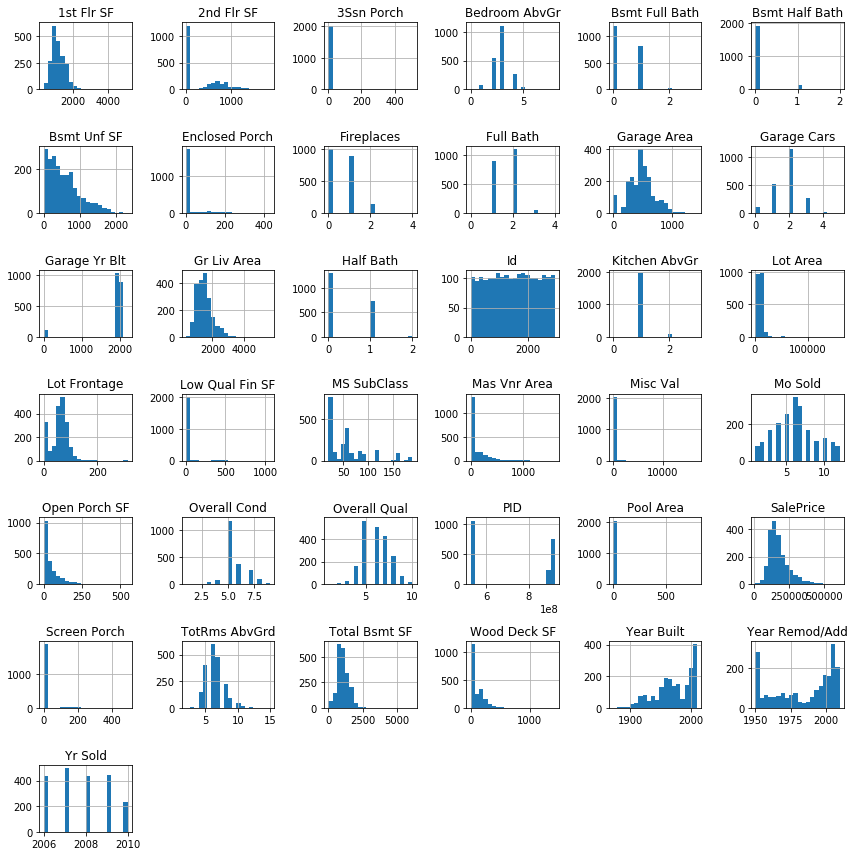

In [68]:
train_data.hist(figsize=(12, 12),bins=20)
plt.tight_layout();

Sales price is skew to the right. As a result, I would log the sales price column to make a more accorate prediction. Also, I will need to do some feature enineering to the first floor, second floor and basement by adding them for a total square feet. I will then make a dummy basement and secound floor.   

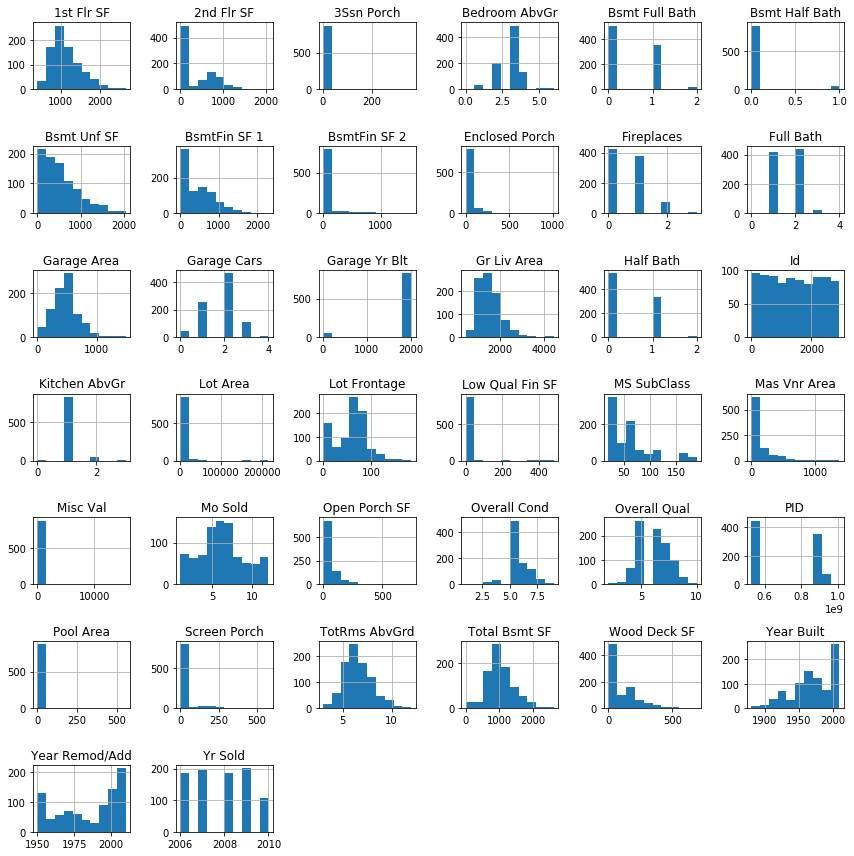

In [69]:
test_data.hist(figsize=(12, 12))
plt.tight_layout();

In [71]:
df = train_data.drop(columns=['Id'])

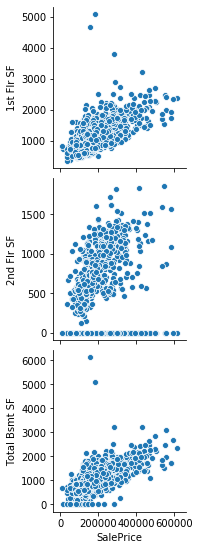

In [72]:
# Comparing square footage of differnt floors
sns.pairplot(train_data, x_vars=['SalePrice'], y_vars=['1st Flr SF', '2nd Flr SF', 'Total Bsmt SF']);

Since a lot of house dont have 2nd floors, and some house dont have basements. I am going to combined all the total square footage into a total. 

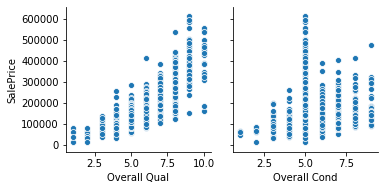

In [71]:
# Comparing overall quality and condition of differnt floors
sns.pairplot(train_data, y_vars=['SalePrice'], x_vars=['Overall Qual','Overall Cond']);

If I dummy both these features currently, I will end up with 20 new features, which will hurt my adjusted r2. Instead, I will cut the new features in half by categorizing the data for each.

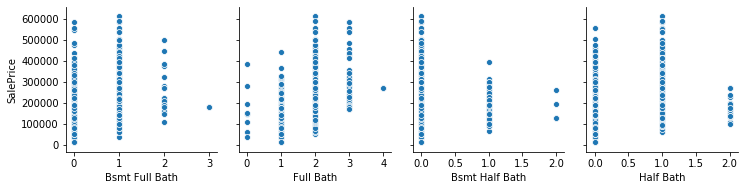

In [72]:
# Comparing overall lot area and lot frontage
sns.pairplot(train_data, y_vars=['SalePrice'], x_vars=['Bsmt Full Bath', 'Full Bath', 'Bsmt Half Bath', 'Half Bath']);

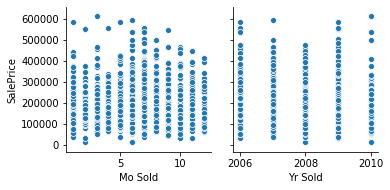

In [73]:
# Comparing month sold
sns.pairplot(train_data, y_vars=['SalePrice'], x_vars=['Mo Sold', 'Yr Sold']);

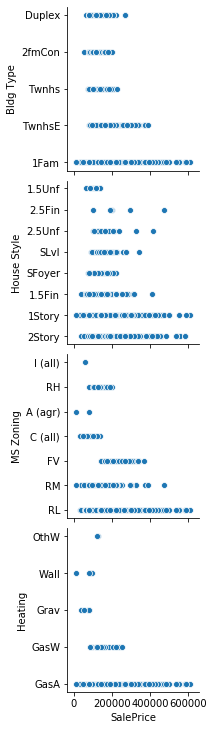

In [74]:
# Comparing build type, house style, MS Zoning, Heating
sns.pairplot(train_data, x_vars=['SalePrice'], y_vars=['Bldg Type', 'House Style','MS Zoning','Heating']);

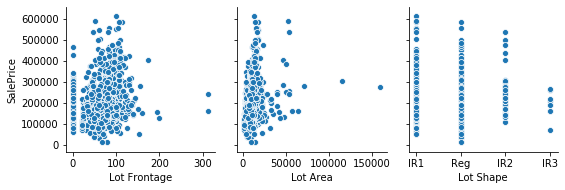

In [75]:
# Comparing overall lot area and lot frontage
sns.pairplot(train_data, y_vars=['SalePrice'], x_vars=['Lot Frontage','Lot Area', 'Lot Shape']);

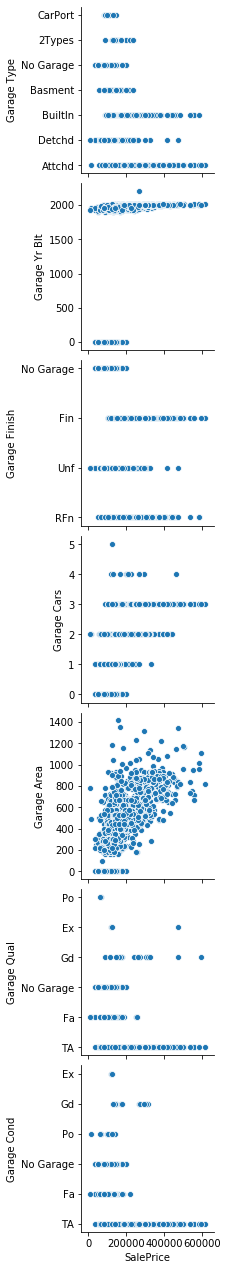

In [76]:
# Comparing overall Garage features
sns.pairplot(train_data, x_vars=['SalePrice'], y_vars=['Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']);

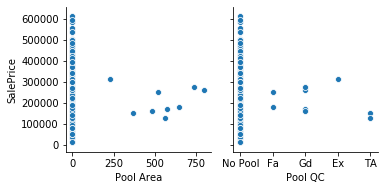

In [77]:
# Comparing overall Pool features
sns.pairplot(train_data, y_vars=['SalePrice'], x_vars=['Pool Area', 'Pool QC']);

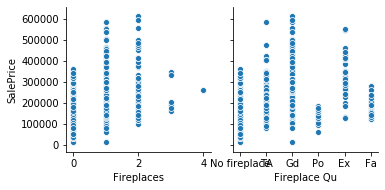

In [78]:
# Comparing overall Pool features
sns.pairplot(train_data, y_vars=['SalePrice'], x_vars=['Fireplaces', 'Fireplace Qu']);

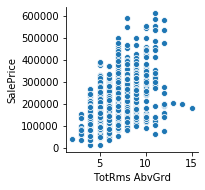

In [79]:
# Comparing overall Total rooms abv ground
sns.pairplot(train_data, y_vars=['SalePrice'], x_vars=['TotRms AbvGrd']);

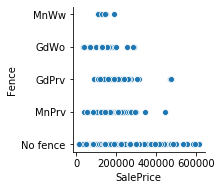

In [80]:
# Comparing Fence vs sales price
sns.pairplot(train_data, x_vars=['SalePrice'], y_vars=['Fence']);

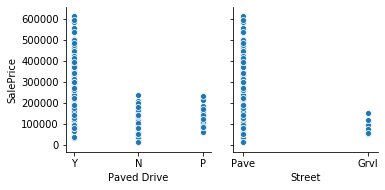

In [81]:
# Comparing paved drive and street vs sales price
sns.pairplot(train_data, y_vars=['SalePrice'], x_vars=['Paved Drive','Street']);

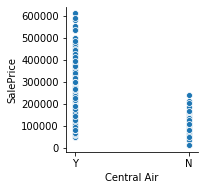

In [82]:
# Comparing central Ac vs sale price
sns.pairplot(train_data, y_vars=['SalePrice'], x_vars=['Central Air']);

# Feature Engeering

In [84]:
#Creating the new clean data set
train_data_clean = train_data[['Id','SalePrice', 'Lot Area', 'Garage Area', 'Garage Type', 'Garage Cars' ,'Fireplaces', 'Fireplace Qu', 'Fence', 'Paved Drive', 'Street', 'Central Air']]

In [85]:
# function to re categories
def rank_cat(ranking):
    if ranking >= 9:
        return 'Excellent'
    elif 9 > ranking >= 7:
        return 'Good'
    elif 7 > ranking >=5:
        return 'Average'
    elif 5 > ranking >=3:
        return 'Fair'
    else: 
        return 'Poor'

Overall Cond:

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
       

In [86]:
# function to re categories
def cond_rank_cat(ranking):
    if ranking >= 9:
        return 'Excellent'
    elif 9 > ranking >= 6:
        return 'Good'
    elif  ranking ==5:
        return 'Average'
    elif 5 > ranking >=3:
        return 'Fair'
    else: 
        return 'Poor'

In [87]:
train_data['Overall Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

**note:** Saw some mutlticorr in some fo the dummies in modeling, and I am going to re categories again

In [88]:
train_data_clean['Overall Qual'] = train_data['Overall Qual'].map(rank_cat)

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
train_data_clean['Overall Qual'].value_counts()

Average      1069
Good          681
Fair          188
Excellent     100
Poor           13
Name: Overall Qual, dtype: int64

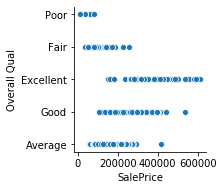

In [90]:
sns.pairplot(train_data_clean, x_vars=['SalePrice'], y_vars = ['Overall Qual']);

In [91]:
train_data_clean['Overall Cond'] = train_data['Overall Cond'].map(cond_rank_cat)

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
train_data_clean['Overall Cond'].value_counts()

Average      1168
Good          739
Fair          105
Excellent      29
Poor           10
Name: Overall Cond, dtype: int64

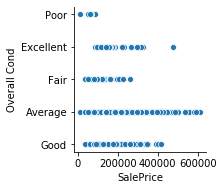

In [93]:
sns.pairplot(train_data_clean, x_vars=['SalePrice'], y_vars = ['Overall Cond']);

### Creating the total square feet column

In [94]:
train_data_clean['total_sqr_ft'] = train_data['1st Flr SF'] + train_data['2nd Flr SF'] + train_data['Total Bsmt SF']

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Creating the total for full bathrooms

In [95]:
train_data_clean['total_full_bathrooms'] = train_data['Bsmt Full Bath'] + train_data['Full Bath']

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Creating the total for half bathrooms

In [96]:
train_data_clean['total_half_bathrooms'] = train_data['Bsmt Half Bath'] + train_data['Half Bath']

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Creating dummy for basement

In [97]:
train_data_clean['has_basement'] = train_data['Total Bsmt SF'].map(lambda x: 1 if x > 0 else 0)

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
#squaring total square feet 
train_data_clean['total_sqr_ft^2'] = train_data_clean['total_sqr_ft']**2

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


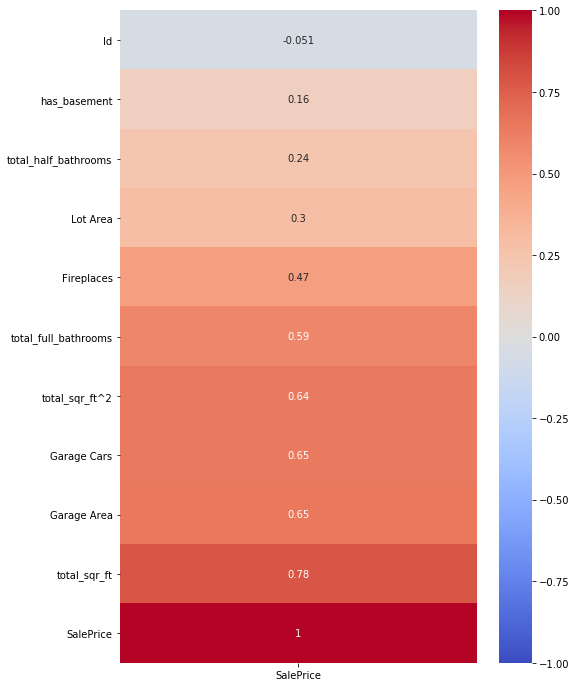

In [99]:
plt.figure(figsize=(8, 12))
sns.heatmap(train_data_clean.corr()[['SalePrice']].sort_values('SalePrice'),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1);

In [100]:
#Creating csv for clean training data
train_data_clean.to_csv('../datasets/train_data_clean.csv', index = True)

In [101]:
train_data_clean.shape

(2051, 19)

### Cleaning testing data

In [102]:
#Creating the new clean data set
test_data_clean = test_data[['Id','Lot Area', 'Garage Area', 'Garage Type', 'Garage Cars' ,'Fireplaces', 'Fireplace Qu', 'Fence', 'Paved Drive', 'Street', 'Central Air']]

In [103]:
test_data_clean['Overall Qual'] = test_data['Overall Qual'].map(rank_cat)

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
test_data_clean['Overall Cond'] = test_data['Overall Cond'].map(cond_rank_cat)

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
test_data_clean['total_sqr_ft'] = test_data['1st Flr SF'] + test_data['2nd Flr SF'] + test_data['Total Bsmt SF']

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
test_data_clean['total_full_bathrooms'] = test_data['Bsmt Full Bath'] + test_data['Full Bath']

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
test_data_clean['total_half_bathrooms'] = test_data['Bsmt Half Bath'] + test_data['Half Bath']

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
test_data_clean['has_basement'] = test_data['Total Bsmt SF'].map(lambda x: 1 if x > 0 else 0)

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
#squaring total square feet 
test_data_clean['total_sqr_ft^2'] = test_data_clean['total_sqr_ft']**2

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
test_data_clean.shape

(878, 18)

In [111]:
test_data_clean.to_csv('../datasets/test_data_clean.csv', index = True)